SMU BOSS Bid Price Analytics

Import necessary libraries

In [218]:
import pandas as pd
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np

Data Preprocessing

In [219]:
data = pd.read_excel("data/merged_file.xls")
print(f"Unfiltered Number of rows: {data.shape[0]}")

# Handling missing data: Remove rows with "Median Bid" equal to 0 or empty "Instructor" column
filtered_data = data.drop(data[(data["Median Bid"] == 0) | (data["Instructor"].fillna("") == "") | (data["Session"] != "Regular Academic Session")].index)
filtered_data["round_successful_bids"] = filtered_data["Before Process Vacancy"] - filtered_data["After Process Vacancy"]

# Delete unnecessary columns
cols_to_delete = ["D.I.C.E"]
filtered_data.drop(columns=cols_to_delete, inplace=True)
print(filtered_data.columns)

Unfiltered Number of rows: 147998
Index(['Term', 'Session', 'Bidding Window', 'Course Code', 'Description',
       'Section', 'Vacancy', 'Opening Vacancy', 'Before Process Vacancy',
       'After Process Vacancy', 'Enrolled Students', 'Median Bid', 'Min Bid',
       'Instructor', 'School/Department', 'round_successful_bids'],
      dtype='object')


Filter Dataframe by Course Code

In [230]:
course_code = "COR-STAT1202"

course_data = filtered_data[filtered_data["Course Code"] == course_code]
print(f"Instructor Data Shape: {course_data.shape}")
course_data.head()

Instructor Data Shape: (973, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
184,2022-23 Term 1,Regular Academic Session,Round 2A Window 3,COR-STAT1202,Introductory Statistics,G1,45.0,45.0,1.0,0.0,45.0,11.02,11.02,WU ZHENGXIAO,SOE,1.0
1263,2022-23 Term 1,Regular Academic Session,Round 2A Window 2,COR-STAT1202,Introductory Statistics,G7,45.0,45.0,1.0,0.0,45.0,10.00,10.00,KWONG KOON SHING,SOE,1.0
3362,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-STAT1202,Introductory Statistics(SMU-X),G13,45.0,45.0,4.0,3.0,42.0,12.50,12.50,ROSIE CHING,SOE,1.0
3364,2022-23 Term 1,Regular Academic Session,Round 2 Window 3,COR-STAT1202,Introductory Statistics,G15,45.0,45.0,1.0,0.0,45.0,30.45,30.45,DANIEL SOH,SOE,1.0
4417,2022-23 Term 1,Regular Academic Session,Round 2 Window 2,COR-STAT1202,Introductory Statistics(SMU-X),G11,45.0,45.0,8.0,7.0,38.0,17.00,17.00,ROSIE CHING,SOE,1.0


Explore Bid Price for the specified course code

In [231]:
min_median_value = course_data["Median Bid"].min()
max_median_value = course_data["Median Bid"].max()
median_median_value = round(course_data["Median Bid"].median(), 2)
mean_median_value = round(course_data["Median Bid"].mean(), 2)
print(f"The min, max, median and mean values for ALL of {course_code}'s median bid prices are {min_median_value, max_median_value, median_median_value, mean_median_value} respectively.")

The min, max, median and mean values for ALL of COR-STAT1202's median bid prices are (10.0, 100.0, 29.6, 31.32) respectively.


Which Instructors teach the specified course?

In [232]:
unique_instructors = course_data["Instructor"].unique()
print(f"Instructors that teach {course_code}: {unique_instructors}")

Instructors that teach COR-STAT1202: [' WU ZHENGXIAO' ' KWONG KOON SHING' ' ROSIE CHING' ' DANIEL SOH'
 ' ZHANG YAJIE' ' RAYMOND TEO' ' LIU SHEW FAN' ' YEO KENG LEONG'
 ' GAN CHUI GOH' ' GOH JING RONG' ' DEBANJALI ROY' ' DENIS LEUNG']


Filter dataframe by Instructor

In [246]:
instructor_name = "RAYMOND TEO"

# Remove leading and trailing whitespace from instructor names column
course_data.loc[:, "Instructor"] = course_data["Instructor"].str.strip()

instructor_course_data = course_data[course_data["Instructor"] == instructor_name]
print(f"Instructor Course Data Shape: {instructor_course_data.shape}")
instructor_course_data.head()

Instructor Course Data Shape: (185, 16)


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
5485,2022-23 Term 1,Regular Academic Session,Round 2 Window 1,COR-STAT1202,Introductory Statistics,G21,45.0,45.0,1.0,0.0,45.0,40.00,40.00,RAYMOND TEO,SOE,1.0
8642,2022-23 Term 1,Regular Academic Session,Round 1A Window 2,COR-STAT1202,Introductory Statistics,G18,45.0,15.0,1.0,0.0,15.0,22.99,22.99,RAYMOND TEO,SOE,1.0
9719,2022-23 Term 1,Regular Academic Session,Round 1A Window 1,COR-STAT1202,Introductory Statistics,G21,45.0,15.0,2.0,0.0,15.0,15.33,10.00,RAYMOND TEO,SOE,2.0
10792,2022-23 Term 1,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G18,45.0,15.0,5.0,0.0,15.0,47.72,47.60,RAYMOND TEO,SOE,5.0
10793,2022-23 Term 1,Regular Academic Session,Round 1 Window 2,COR-STAT1202,Introductory Statistics,G19,45.0,15.0,5.0,0.0,15.0,55.60,30.00,RAYMOND TEO,SOE,5.0


Explore Bid Price for the specified instructor for the specified course

In [247]:
min_course_median_value = instructor_course_data["Median Bid"].min()
max_course_median_value = instructor_course_data["Median Bid"].max()
median_course_median_value = round(instructor_course_data["Median Bid"].median(), 2)
mean_course_median_value = round(instructor_course_data["Median Bid"].mean(), 2)
print(f"The min, max, median and mean values for {instructor_name}'s {course_code} median bid prices are {min_course_median_value, max_course_median_value, median_course_median_value, mean_course_median_value} respectively.")

The min, max, median and mean values for RAYMOND TEO's COR-STAT1202 median bid prices are (10.0, 82.6, 46.18, 43.13) respectively.


Filter dataframe by Academic Year and/or Term

In [248]:
AY = "2021-22"
# Filter by Term (Term 1 or Term 2)?
term = "Term 1"
if term:
    AY += f" {term}"
    
instructor_course_data = instructor_course_data.sort_values(by="Bidding Window", ignore_index=True)
instructor_course_data = instructor_course_data[instructor_course_data["Term"].str.contains(AY, case=False)]
print(instructor_course_data["Term"])
instructor_course_data.head()

0      2021-22 Term 1
8      2021-22 Term 1
9      2021-22 Term 1
10     2021-22 Term 1
11     2021-22 Term 1
12     2021-22 Term 1
21     2021-22 Term 1
22     2021-22 Term 1
23     2021-22 Term 1
24     2021-22 Term 1
25     2021-22 Term 1
26     2021-22 Term 1
31     2021-22 Term 1
32     2021-22 Term 1
34     2021-22 Term 1
35     2021-22 Term 1
46     2021-22 Term 1
47     2021-22 Term 1
48     2021-22 Term 1
49     2021-22 Term 1
50     2021-22 Term 1
51     2021-22 Term 1
79     2021-22 Term 1
80     2021-22 Term 1
89     2021-22 Term 1
98     2021-22 Term 1
99     2021-22 Term 1
111    2021-22 Term 1
112    2021-22 Term 1
114    2021-22 Term 1
115    2021-22 Term 1
116    2021-22 Term 1
117    2021-22 Term 1
136    2021-22 Term 1
137    2021-22 Term 1
143    2021-22 Term 1
154    2021-22 Term 1
155    2021-22 Term 1
156    2021-22 Term 1
160    2021-22 Term 1
163    2021-22 Term 1
168    2021-22 Term 1
169    2021-22 Term 1
184    2021-22 Term 1
Name: Term, dtype: object


,Term,Session,Bidding Window,Course Code,Description,Section,Vacancy,Opening Vacancy,Before Process Vacancy,After Process Vacancy,Enrolled Students,Median Bid,Min Bid,Instructor,School/Department,round_successful_bids
0,2021-22 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 1,COR-STAT1202,Introductory Statistics,G21,45.0,45.0,35.0,5.0,40.0,22.80,10.79,RAYMOND TEO,SOE,30.0
8,2021-22 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 1,COR-STAT1202,Introductory Statistics,G20,45.0,45.0,31.0,4.0,41.0,27.28,10.00,RAYMOND TEO,SOE,27.0
9,2021-22 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 1,COR-STAT1202,Introductory Statistics,G19,45.0,45.0,33.0,0.0,45.0,30.32,23.75,RAYMOND TEO,SOE,33.0
10,2021-22 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 1,COR-STAT1202,Introductory Statistics,G18,45.0,45.0,33.0,6.0,39.0,30.21,15.88,RAYMOND TEO,SOE,27.0
11,2021-22 Term 1,Regular Academic Session,Incoming Freshmen Rnd 1 Win 1,COR-STAT1202,Introductory Statistics,G17,45.0,45.0,29.0,9.0,36.0,20.00,10.00,RAYMOND TEO,SOE,20.0


Bid Price Visualisation for specified prof, course, AY and/or Term:

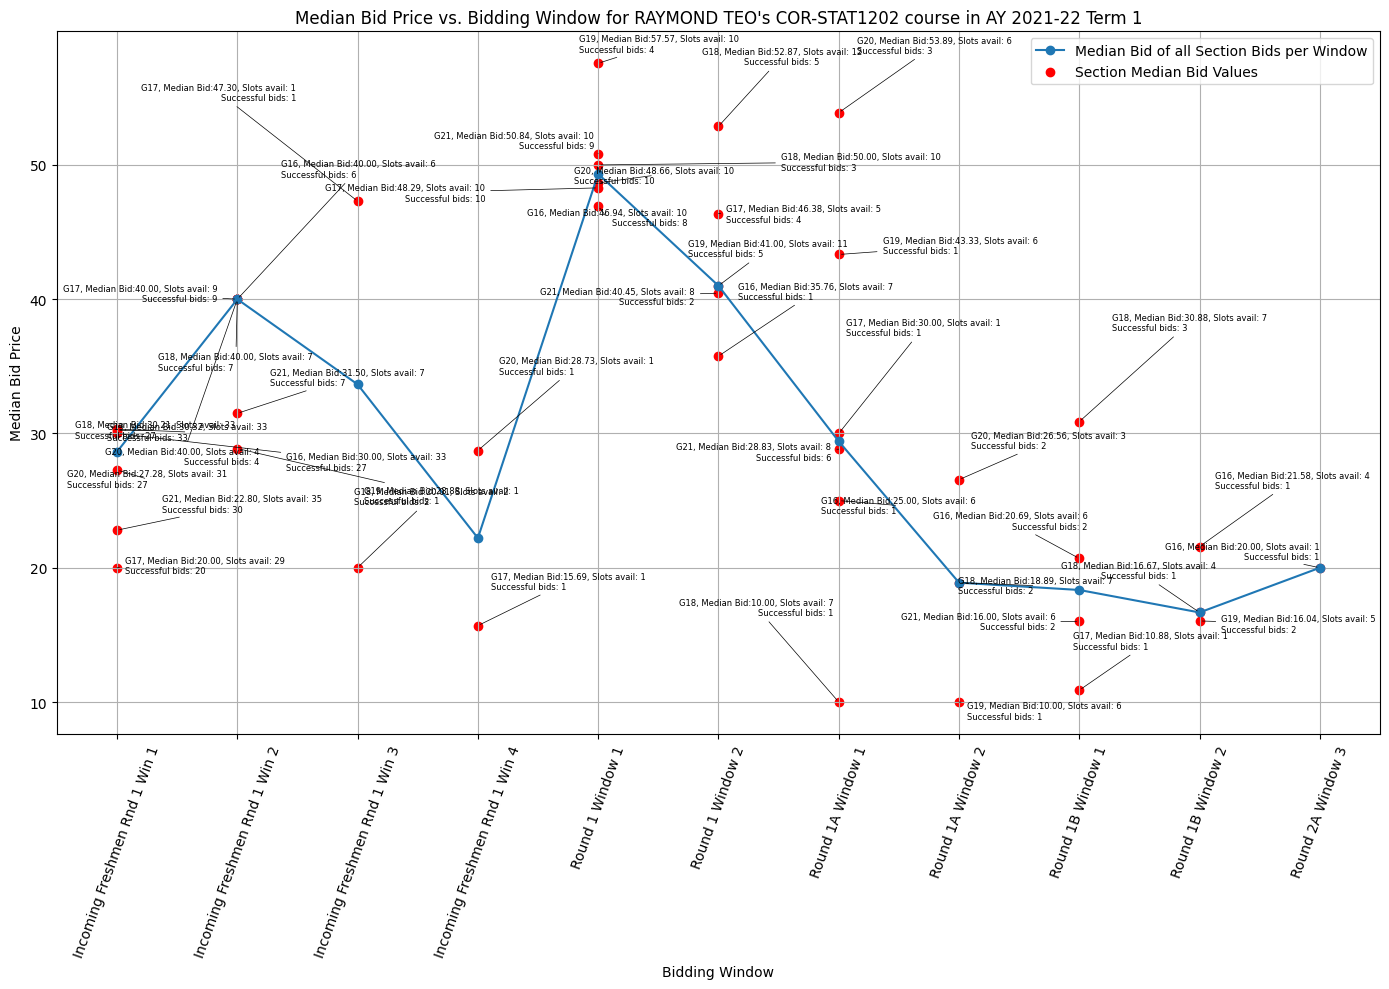

In [249]:
median_bid_by_window = instructor_course_data.groupby('Bidding Window')['Median Bid'].median().reset_index()

plt.figure(figsize=(14, 10))

# Plot the median bid values by window as a line
plt.plot(
    median_bid_by_window['Bidding Window'],
    median_bid_by_window['Median Bid'],
    marker='o',
    label='Median Bid of all Section Bids per Window'
)

# Plot all individual bid values as points
plt.scatter(
    instructor_course_data['Bidding Window'],
    instructor_course_data['Median Bid'],
    color='red',
    label='Section Median Bid Values'
)

plt.title(f"Median Bid Price vs. Bidding Window for {instructor_name}'s {course_code} course in AY {AY}")
plt.xlabel('Bidding Window')
plt.ylabel('Median Bid Price')
plt.xticks(rotation=70)
plt.grid(True)
plt.tight_layout()

max_y_values = {}

# Annotate data points with their "Section" value and adjust y-coordinate dynamically
annotations = []
for x, y, sem, section, slots_avail, round_successful_bids in zip(instructor_course_data["Bidding Window"], instructor_course_data["Median Bid"],instructor_course_data["Term"], instructor_course_data["Section"], instructor_course_data["Before Process Vacancy"], instructor_course_data["round_successful_bids"]):
    max_y = max_y_values.get(x, 0) 
    y_offset = max_y + 2
    max_y_values[x] = y_offset
    displayed_text = f"{section}, Median Bid:{y:.2f}, Slots avail: {int(slots_avail)}\nSuccessful bids: {int(round_successful_bids)}"
    if not term:
        displayed_text = f"Term {sem[-1]} {displayed_text}"
        print(displayed_text)
    annotation = plt.annotate(displayed_text, (x, y),
                            textcoords="offset points",
                            xytext=(0, y_offset),
                            ha='center', fontsize=6,
                            arrowprops=dict(arrowstyle='-', lw=0.5, color='black'))
    annotations.append(annotation)

# Use the adjust_text function to adjust the position of overlapping annotations
adjust_text(annotations, autoalign="xy", only_move={"points": "xy"})

plt.legend()
plt.show()

Visualise each Instructor's min, mean and median bids with a Bar chart

In [251]:
# we want to create our own dataframe with the min, max mean and median median bid values
data = []

for instructor_name in unique_instructors:
    instructor_data = course_data[course_data["Instructor"] == instructor_name.strip()]
    min_value = instructor_data["Median Bid"].min()
    max_value = instructor_data["Median Bid"].max()
    median_value = round(instructor_data["Median Bid"].median(), 2)
    mean_value = round(instructor_data["Median Bid"].mean(), 2)
    data.append([instructor_name, min_value, max_value, mean_value, median_value])

# Create a DataFrame from the collected results
data_df = pd.DataFrame(data, columns=["Instructor", "Min Median Bid", "Max Median Bid", "Median Median Bid", "Mean Median Bid"])
print(data_df)
data_df.head()


           Instructor  Min Median Bid  Max Median Bid  Median Median Bid  \
0        WU ZHENGXIAO           10.00          100.00              32.04   
1    KWONG KOON SHING           10.00           43.47              25.43   
2         ROSIE CHING           10.00           80.00              18.71   
3          DANIEL SOH           12.55           33.18              23.48   
4         ZHANG YAJIE           10.40           65.20              27.26   
5         RAYMOND TEO           10.00           82.60              43.13   
6        LIU SHEW FAN           10.00           74.95              36.89   
7      YEO KENG LEONG           10.00           55.99              31.23   
8        GAN CHUI GOH           10.00           65.49              27.84   
9       GOH JING RONG           10.00           67.23              35.19   
10      DEBANJALI ROY           14.69           31.02              20.89   
11        DENIS LEUNG           11.01           51.44              29.53   

    Mean Me

,Instructor,Min Median Bid,Max Median Bid,Median Median Bid,Mean Median Bid
0,WU ZHENGXIAO,10.00,100.00,32.04,30.52
1,KWONG KOON SHING,10.00,43.47,25.43,25.13
2,ROSIE CHING,10.00,80.00,18.71,16.06
3,DANIEL SOH,12.55,33.18,23.48,24.38
4,ZHANG YAJIE,10.40,65.20,27.26,25.99


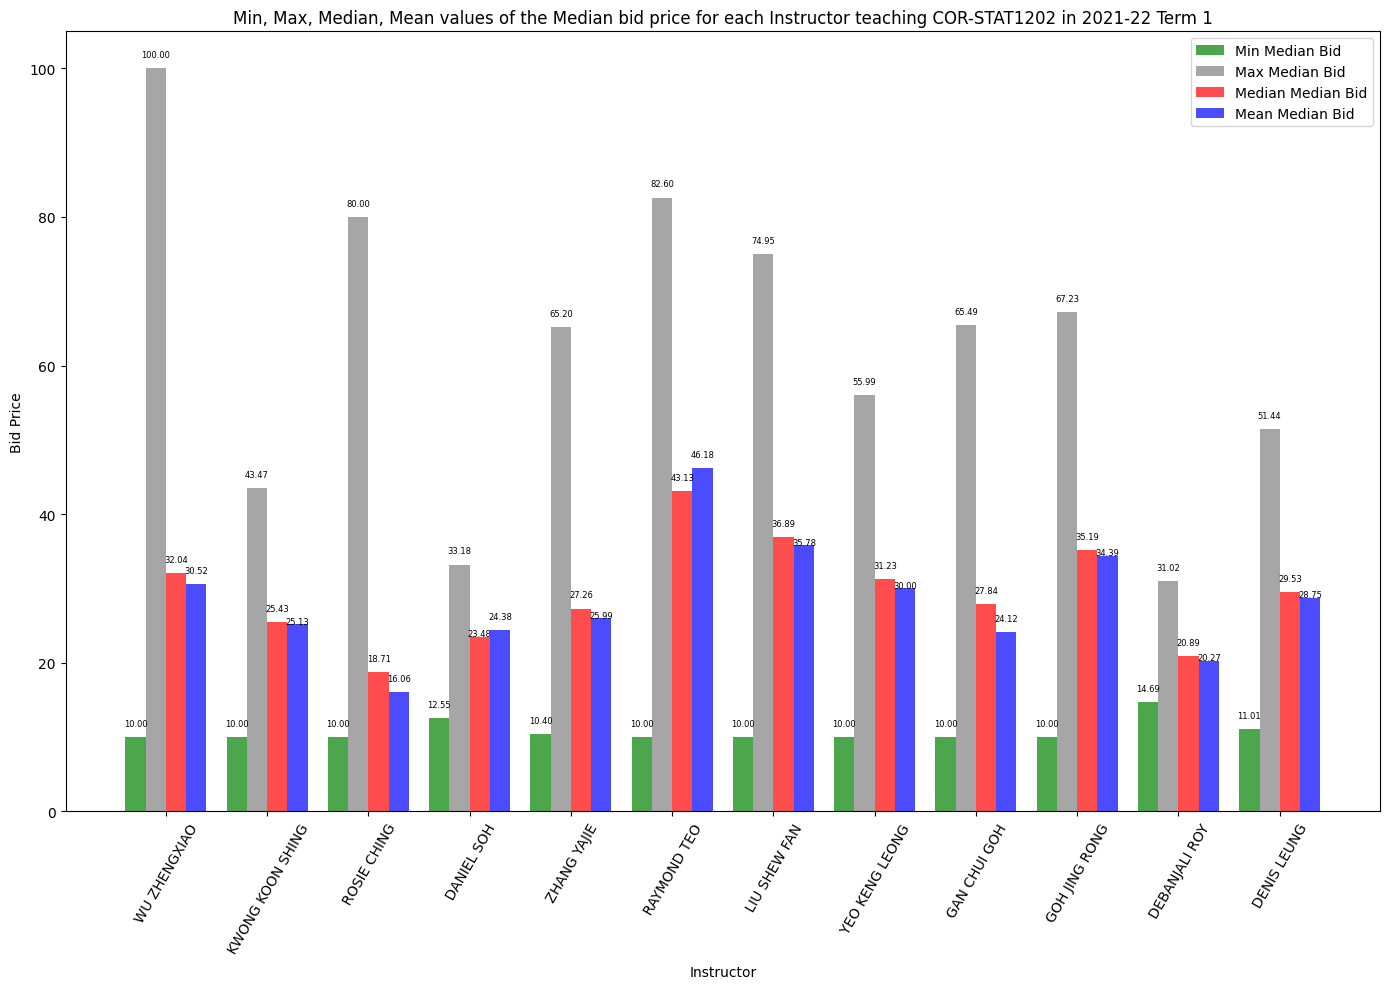

In [252]:
# choose bars you want to show:
show_min_bar = True
show_max_bar = True
show_median_bar = True
show_mean_bar = True


# Create an array of x-coords for each instructor
x = np.arange(len(data_df["Instructor"]))

# Width of the bars for each instructor's group
group_width = 0.2 

# Create a vertical bar chart with no spaces between bars within an instructor's group
plt.figure(figsize=(14, 10))

bar_chart_annotations = []
def add_values_on_bars(bars):
    global bar_chart_annotations
    for bar in bars:
        height = bar.get_height()
        annotation = plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 6), textcoords='offset points', ha='center', va='bottom', fontsize=6)
        bar_chart_annotations.append(annotation)

if show_min_bar:
    min_bars = plt.bar(x - 1.5*group_width, data_df["Min Median Bid"], width=group_width, label="Min Median Bid", alpha=0.7, color="green")
    add_values_on_bars(min_bars)
if show_max_bar:
    max_bars = plt.bar(x - 0.5*group_width, data_df["Max Median Bid"], width=group_width, label="Max Median Bid", alpha=0.7, color="grey")
    add_values_on_bars(max_bars)
if show_median_bar:
    median_bars = plt.bar(x + 0.5*group_width, data_df["Median Median Bid"], width=group_width, label="Median Median Bid", alpha=0.7, color="red")
    add_values_on_bars(median_bars)
if show_mean_bar:
    mean_bars = plt.bar(x + 1.5 * group_width, data_df["Mean Median Bid"], width=group_width, label="Mean Median Bid", alpha=0.7, color="blue")
    add_values_on_bars(mean_bars)




adjust_text(bar_chart_annotations, autoalign="y", only_move={"points": "y"})
# Set x-axis ticks and labels
plt.xticks(x, data_df["Instructor"], rotation=60)

# Set labels and title
plt.xlabel("Instructor")
plt.ylabel("Bid Price")
plt.title(f"Min, Max, Median, Mean values of the Median bid price for each Instructor teaching {course_code} in {AY}")

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()